In [4]:
# import pandas, numpy, decision tree, random forest, and metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score 

In [5]:
# import csv data into a DataFrame
df = pd.read_csv('loan_data.csv')

df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1


In [8]:
# 1.1 know your data - 1

print('1.1.1 - First 5 Lines:')

# print the first 5 lines of the dataset including headings
df.head(5)

1.1.1 - First 5 Lines:


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
# 1.1 know your data - 2

print('1.1.2 - Basic Statistics of Features')

# determine the basic statistics of the dataset (count, mean, stddev, min, max, 25:50:75 percentiles)
df.describe()

1.1.2 - Basic Statistics of Features


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9.577000e+03,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,0.805054,0.122638,319.033619,10.932082,12.606295,710.844106,4560.748482,1.691177e+04,46.798171,1.577007,0.163726,0.062128,0.159967
std,0.396180,0.026848,207.010102,0.614835,6.884227,37.971904,2497.060076,3.375727e+04,29.015745,2.199896,0.546241,0.262139,0.366594
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.210000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.660000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.350000,11.291780,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
# 1.1 know your data - 3

print("1.1.3 - The breakdown of the credit.policy column is:")

# remap credit.policy column to readable labels
remapped_credit_policy = df['credit.policy'].replace({0:'Not Approved', 1:'Approved'})
# determine the count of each value type in the credit.policy column
print(remapped_credit_policy.value_counts())

1.1.3 - The breakdown of the credit.policy column is:
Approved        7710
Not Approved    1867
Name: credit.policy, dtype: int64


1.1.4 - Histogram of Installments Column By Approved and Not Approved
AxesSubplot(0.125,0.125;0.775x0.755)


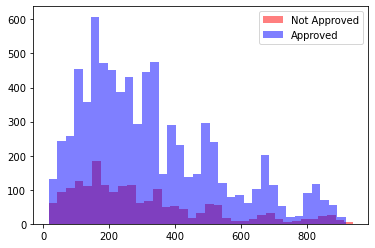

In [12]:
# 1.1 know your data - 4

# initialize plot for histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# initialize number of bins for the histogram
num_bins = 35

# create histogram of not approved installments
ax.hist(x=df['installment'][df['credit.policy']==0], bins=num_bins, alpha=0.5, color='red', label='Not Approved')
# create histogram of approved installments
ax.hist(x=df['installment'][df['credit.policy']==1], bins=num_bins, alpha=0.5, color='blue', label='Approved')
# decide where to place legend in histogram
ax.legend(loc='upper right')

print('1.1.4 - Histogram of Installments Column By Approved and Not Approved')
print(ax)

1.1.5 - Boxplots of Fico Score That Varies Between Approved And Not Approved
AxesSubplot(0.1,0.15;0.8x0.75)


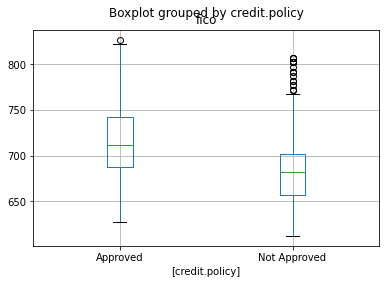

In [394]:
# 1.1 know your data - 5

# join the mapped credit policy column with fico column
boxplot_data = pd.concat([df['fico'], remapped_credit_policy], axis=1)
# create boxplot 
boxplot = boxplot_data.boxplot(column=['fico'], by=['credit.policy'])

print('1.1.5 - Boxplots of Fico Score That Varies Between Approved And Not Approved')
print(boxplot)

In [395]:
# 1.2.1 - data preprocessing & splitting

# create dummy variables for categorical descriptive feature (credit.policy)
tree_data = pd.get_dummies(df, columns=['purpose'])
# separate descriptive & target features
descriptive = tree_data.drop('not.fully.paid', axis=1).to_numpy()
target = tree_data['not.fully.paid'].to_numpy()

# get training and testing datasets
train_descriptive, test_descriptive, train_target, test_target = train_test_split(descriptive, target, train_size=0.7, test_size=0.3)

In [396]:
# 1.2.2 - training a decision tree

# Decision Tree - Information Gain (Entropy)
dt_info_gain = DecisionTreeClassifier(criterion='entropy', splitter='best')
# fit the information gain model with training data
df_info_gain = dt_info_gain.fit(X=train_descriptive, y=train_target)
# use the information gain model to make predictions on testing data
dt_info_gain_predict = dt_info_gain.predict(test_descriptive)
# run cross validation on the model with 10 folds
# scores mean accuracy
dt_info_gain_cv = cross_val_score(dt_info_gain, train_descriptive, train_target, cv=10)

# Decision Tree - Gini
dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best')
# fit the gini model with training data
dt_gini = dt_gini.fit(X=train_descriptive, y=train_target)
# use the gini model to make predictions on testing data
dt_gini_predict = dt_gini.predict(test_descriptive)
# run cross validation on the model with 10 folds
# scores mean accuracy
dt_gini_cv = cross_val_score(dt_gini, train_descriptive, train_target, cv=10)

# calculate the mean of the results from 10-fold cross validation 
dt_info_gain_cv_mean = dt_info_gain_cv.mean()
dt_gini_cv_mean = dt_gini_cv.mean()

print('Decision Tree Information Gain: {:0.2%} mean accuracy score for 10-fold cross validation'.format(dt_info_gain_cv_mean))
print('Decision Tree Gini: {:0.2%} mean accuracy score for 10-fold cross validation'.format(dt_gini_cv_mean))

print('''\nFor the decision tree, the accuracies of each criteria are generally very similar. They typically hover around 74%.
However, in this evaluation of 10-fold cross validation:''', end=" ")
if (dt_info_gain_cv_mean < dt_gini_cv_mean):
    print("The gini index classification performed better than information gain.")
else:
    print("The information gain classification performed better than gini index.")

Decision Tree Information Gain: 73.64% mean accuracy score for 10-fold cross validation
Decision Tree Gini: 74.65% mean accuracy score for 10-fold cross validation

For the decision tree, the accuracies of each criteria are generally very similar. They typically hover around 74%.
However, in this evaluation of 10-fold cross validation: The gini index classification performed better than information gain.


In [397]:
# 1.2.3 - training a random forest

# Random Forest - Information Gain (Entropy)
rf_info_gain = RandomForestClassifier(criterion='entropy', n_estimators=15, max_samples=1000, bootstrap=True)
# fit the information gain model to training data
rf_info_gain = rf_info_gain.fit(X=train_descriptive, y=train_target)
# use the information gain model to make predictions on testing data
rf_info_gain_predict = rf_info_gain.predict(test_descriptive)
# run cross validation on the model with 10 folds
rf_info_gain_cv = cross_val_score(rf_info_gain, train_descriptive, train_target, cv=10)

# Random Forest - Gini
rf_gini = RandomForestClassifier(criterion='gini', n_estimators=15, max_samples=1000, bootstrap=True)
# fit the gini model to training data
rf_gini = rf_gini.fit(X=train_descriptive, y=train_target)
# use the gini model to make predictions on testing data
rf_gini_predict = rf_gini.predict(test_descriptive)
# run cross validation on the model with 10 folds
rf_gini_cv = cross_val_score(rf_gini, train_descriptive, train_target, cv=10)

# calculate the mean of the results from 10-fold cross validation 
rf_info_gain_cv_mean = rf_info_gain_cv.mean()
rf_gini_cv_mean = rf_gini_cv.mean()

print('Random Forest Information Gain: {:0.2%} mean accuracy score for 10-fold cross validation'.format(rf_info_gain_cv_mean))
print('Random Forest Gini: {:0.2%} mean accuracy score for 10-fold cross validation'.format(rf_gini_cv_mean))

print('''\nFor the random forest, the accuracies of each criteria are generally very similar. They typically hover around 83%.
However, in this evaluation of 10-fold cross validation:''', end=" ")
if (rf_info_gain_cv_mean < rf_gini_cv_mean):
    print("The gini index classification performed better than information gain.")
else:
    print("The information gain classification performed better than gini index.")

Random Forest Information Gain: 83.63% mean accuracy score for 10-fold cross validation
Random Forest Gini: 83.69% mean accuracy score for 10-fold cross validation

For the random forest, the accuracies of each criteria are generally very similar. They typically hover around 83%.
However, in this evaluation of 10-fold cross validation: The gini index classification performed better than information gain.


In [404]:
# 1.3 - performance evaluation and analysis
# DECISION TREE

# evaluate the performance of the decision tree using information gain
# calculate precision of decision tree using information gain
dt_info_gain_precision = precision_score(test_target, dt_info_gain_predict, average='binary')
# calculate recall of decision tree using information gain
dt_info_gain_recall = recall_score(test_target, dt_info_gain_predict, average='binary')
# calculate f-1 score of decision tree using information gain
dt_info_gain_f1 = f1_score(test_target, dt_info_gain_predict, average='binary')

# evaluate the performance of the decision tree using gini index
# calculate precision of decision tree using gini index
dt_gini_precision = precision_score(test_target, dt_gini_predict, average='binary')
# calculate recall of decision tree using gini index
dt_gini_recall = recall_score(test_target, dt_gini_predict, average='binary')
# calculate f-1 score of decision tree using gini index
dt_gini_f1 = f1_score(test_target, dt_gini_predict, average='binary')

print('Calculating metrics for how the decision tree predicted the target feature class\n')

# print precision, recall, f1 score results for the class -> not.fully.paid = 1
print('Decision Tree Information Gain')
print(classification_report(test_target, dt_info_gain_predict, digits=4))
print('Decision Tree Gini Index')
print(classification_report(test_target, dt_gini_predict, digits=4))

# alternative print
# print('Decision Tree Information Gain: \nprecision = {:0.4f} \nrecall = {:0.4f} \nf1 score = {:0.4f}'.format(dt_info_gain_precision, dt_info_gain_recall, dt_info_gain_f1))
# print('\nDecision Tree Gini: \nprecision = {:0.4f} \nrecall = {:0.4f} \nf1 score = {:0.4f}'.format(dt_gini_precision, dt_gini_recall, dt_gini_f1))

Calculating metrics for how the decision tree predicted the target feature class

Decision Tree Information Gain
              precision    recall  f1-score   support

           0     0.8415    0.8404    0.8410      2394
           1     0.2091    0.2104    0.2098       480

    accuracy                         0.7352      2874
   macro avg     0.5253    0.5254    0.5254      2874
weighted avg     0.7359    0.7352    0.7355      2874

Decision Tree Gini Index
              precision    recall  f1-score   support

           0     0.8408    0.8275    0.8341      2394
           1     0.2027    0.2188    0.2104       480

    accuracy                         0.7258      2874
   macro avg     0.5218    0.5231    0.5223      2874
weighted avg     0.7343    0.7258    0.7299      2874



In [406]:
# 1.3 - performance evaluation and analysis
# RANDOM FOREST

# evaluate the performance of the random forest using information gain
# calculate precision of random forest using information gain
rf_info_gain_precision = precision_score(test_target, rf_info_gain_predict, average='binary')
# calculate recall of random forest using information gain
rf_info_gain_recall = recall_score(test_target, rf_info_gain_predict, average='binary')
# calculate f-1 score of random forest using information gain
rf_info_gain_f1 = f1_score(test_target, rf_info_gain_predict, average='binary')

# evaluate the performance of the random forest using gini index
# calculate precision of random forest using gini index
rf_gini_precision = precision_score(test_target, rf_gini_predict, average='binary')
# calculate recall of random forest using gini index
rf_gini_recall = recall_score(test_target, rf_gini_predict, average='binary')
# calculate f-1 score of random forest using gini index
rf_gini_f1 = f1_score(test_target, rf_gini_predict, average='binary')

print('Calculating metrics for how the random forest predicted the target feature class\n')

# print precision, recall, f1 score results for the class -> not.fully.paid = 1
print('Random Forest Information Gain')
print(classification_report(test_target, rf_info_gain_predict, digits=4))
print('Random Forest Gini Index')
print(classification_report(test_target, rf_gini_predict, digits=4))

# alternative print
# print('Random Forest Information Gain:  \nprecision = {:0.4f} \nrecall = {:0.4f} \nf1 score = {:0.4f}'.format(rf_info_gain_precision, rf_info_gain_recall, rf_info_gain_f1))
# print('\nRandom Forest Gini:  \nprecision = {:0.4f} \nrecall = {:0.4f} \nf1 score = {:0.4f}'.format(rf_gini_precision, rf_gini_recall, rf_gini_f1))

Calculating metrics for how the random forest predicted the target feature class

Random Forest Information Gain
              precision    recall  f1-score   support

           0     0.8353    0.9850    0.9040      2394
           1     0.2941    0.0312    0.0565       480

    accuracy                         0.8257      2874
   macro avg     0.5647    0.5081    0.4802      2874
weighted avg     0.7449    0.8257    0.7624      2874

Random Forest Gini Index
              precision    recall  f1-score   support

           0     0.8362    0.9871    0.9054      2394
           1     0.3542    0.0354    0.0644       480

    accuracy                         0.8281      2874
   macro avg     0.5952    0.5112    0.4849      2874
weighted avg     0.7557    0.8281    0.7649      2874



<b>1.3 - performance evaluation and analysis
    
PREFACE</b>

The data we're examining is highly imbalanced. Looking at the target feature (<i>not.fully.paid</i>), we see that there are is a significantly smaller amount of instances in the dataset where the value = 1 (what we will define as our <b>positive</b> target label). As a result, this is the <b>minority class</b> of the dataset. On the other hand, the <b>negative</b> target label (<i>not.fully.paid</i> = 0) has a lot more instances in the dataset and thus is the <b>majority class</b>. 

As a result of the dataset imbalance, it is likely that the minority class (<i>not.fully.paid</i> = 1) will have worse evaluation metrics than the majority class (<i>not.fully.paid</i> = 0) because the model did not have nearly as much information as the majority class to properly learn the characteristics of the minority class and accurately predict it.

When calculating the 3 metrics (precision, recall, f-1 score), we will be looking at how the models predicted the 'positive' value (<i>not.fully.paid</i> = 1, borrower doesn't pay back) instead of the 'negative' value. 

This due to:<br>
A) The fact that is arguably more important to accurately predict that the borrower will NOT pay back their loan in full with these models. We would want to confidently identify borrowers to avoid loaning to.<br>
B) The fact that the negative value (<i>not.fully.paid</i> = 0) has better metrics as seen in the classification reports above. Looking at something that already performs well won't give us any good feedback on improving the model.<br>
C) My curiosity for how well the decision tree & random forest would classify the minority class. Again, it will be a better indicator for whether we need to adjust the model or our dataset to better predict the target feature labels than the majority class.


<i>The following cells will briefly describe the results of the metrics for all 4 models (which were shown above) and indicate the best performer for each metric.</i>
<b>After running the code several times, I've noticed that the most common best performers for each metric are:
1. Precision = gini index random forest
2. Recall = gini index decision tree
3. F-1 Score = gini index decision tree</b>
    
HOWEVER, note that the results will likely change if the models are fit & run again due to the randomness of the training/testing data split.

In [400]:
# 1.3 - EVALUATION FOR PRECISION

print('PRECISION')
if (dt_info_gain_precision > max(dt_gini_precision, rf_info_gain_precision, rf_gini_precision)):
    print('The decision tree using information gain', end="")
elif (dt_gini_precision > max(dt_info_gain_precision, rf_info_gain_precision, rf_gini_precision)):
    print('The decision tree using gini index', end="")
elif (rf_info_gain_precision > max(dt_info_gain_precision, dt_gini_precision, rf_gini_precision)):
    print('The random forest using information gain', end="")
elif (rf_gini_precision > max(dt_info_gain_precision, dt_gini_precision, rf_info_gain_precision)):
    print('The random forest using gini index', end="")
print(' had the best precision metric. This means this model was able to most accurately predict the positive labels out of all positive labels that the model predicted.')

PRECISION
The random forest using gini index had the best precision metric. This means this model was able to most accurately predict the positive labels out of all positive labels that the model predicted.


In [401]:
# 1.3 - EVALUATION FOR RECALL

print('RECALL')
if (dt_info_gain_recall > max(dt_gini_recall, rf_info_gain_recall, rf_gini_recall)):
    print('The decision tree using information gain', end="")
elif (dt_gini_recall > max(dt_info_gain_recall, rf_info_gain_recall, rf_gini_recall)):
    print('The decision tree using gini index', end="")
elif (rf_info_gain_recall > max(dt_info_gain_recall, dt_gini_recall, rf_gini_recall)):
    print('The random forest using information gain', end="")
elif (rf_gini_recall > max(dt_info_gain_recall, dt_gini_recall, rf_info_gain_recall)):
    print('The random forest using gini index', end=" ")
print(' had the best recall metric. This means out of all actual positive target labels in the training dataset, this model was able to predict a larger amount of them correctly.')

RECALL
The decision tree using gini index had the best recall metric. This means out of all actual positive target labels in the training dataset, this model was able to predict a larger amount of them correctly.


In [402]:
# 1.3 - EVALUATION FOR F-1 SCORE

print('F-1 SCORE')
if (dt_info_gain_f1 > max(dt_gini_f1, rf_info_gain_f1, rf_gini_f1)):
    print('The decision tree using information gain', end="")
elif (dt_gini_f1 > max(dt_info_gain_f1, rf_info_gain_f1, rf_gini_f1)):
    print('The decision tree using gini index', end="")
elif (rf_info_gain_f1 > max(dt_info_gain_f1, dt_gini_f1, rf_gini_f1)):
    print('The random forest using information gain', end="")
elif (rf_gini_f1 > max(dt_info_gain_f1, dt_gini_f1, rf_info_gain_f1)):
    print('The random forest using gini index', end=" ")
print(' had the best f-1 score. This is the better metric to use when considering both precision and recall as it balances both metrics using the harmonic mean.')
print('Consequently, this model would perform the best when predicting the positive label considering precision and recall.')

F-1 SCORE
The decision tree using gini index had the best f-1 score. This is the better metric to use when considering both precision and recall as it balances both metrics using the harmonic mean.
Consequently, this model would perform the best when predicting the positive label considering precision and recall.


Regardless of which model performs best according to which metric, we can still see from the metrics displayed nicely above that the model doesn't predict the positive class very well, indicating we need to adjust our model or the dataset to improve the predictability.